In [36]:
# Imports
## For some arithmetic and Matrix Operations
import numpy as np

## Dataframe Manipulation
import pandas as pd

## For Visualization
import matplotlib.pyplot as plt

## For Visualization too
import seaborn as sns

## For Statistical Analysis
from scipy import stats



# Part 1 - Linear Regression

<div dir="rtl" style="text-align: right;">
לצורך חלק זה, נבחר ב3 משתנים מסבירים: מין - משתנה בדיד, צריכת אלכוהול חודשית - משתנה רציף וצריכת פירות חודשית - משתנה רציף ובמשתנה מוסבר אחד - מדד הBMI - משתנה רציף.
</div>

## Part 1.1
    Defining the Hypothesis

<div dir="rtl" style="text-align: right;">
 שאלת המחקר: כיצד משפיעים מין, צריכת אלכוהול חודשית וצריכת פירות חודשית על מדד הBMI?
</div>

## Part 1.2
    Sampling a 200 sized data for the rest of the question

In [37]:
# Load the data
df = pd.read_csv('df_for_proj (1).csv')

df.head()

# Picking a random sample of 200 rows.
np.random.seed(314)
df_sample = df.sample(200)
df_sample.head()

,Unnamed: 0,Heart_Disease,Sex,Depression,BMI,FriedPotato_Consumption,Alcohol_Consumption,Fruit_Consumption
143684,143684,0,0,0,19.20,4.0,0.0,30.0
18803,18803,0,0,0,24.75,0.0,28.0,60.0
244431,244431,0,0,1,47.77,1.0,0.0,20.0
120543,120543,0,0,0,28.19,2.0,0.0,16.0
142511,142511,0,1,0,37.30,3.0,10.0,4.0


## Part 1.3 
    Data visualization and analysis

### Part 1.3.a+b

In [38]:
# Part A - Plot a Histogram for the continuous variables and a table for the categorical variables.


## Defining a new funtction for the visualization
def visualize_numeric(column_name, title, num_of_bins, units, color):
  hist_plot=df_sample[column_name].hist(bins=num_of_bins, color=color, edgecolor = "black",  grid = False)

  mean_value = df_sample[column_name].mean()
  plt.axvline(mean_value, color='mediumaquamarine', linestyle='dashed', linewidth=2, label='Mean')

  ## Display the plot
  plt.title(title + 'Distribution',  size = 15, fontweight = "bold")
  plt.xlabel(title + '['+units+']')
  #hist_plot.set_yscale('log') # Log scale the Y-axis
  plt.ylabel('Count')

  plt.legend()  # Display legend with the label for the mean line

  plt.show()


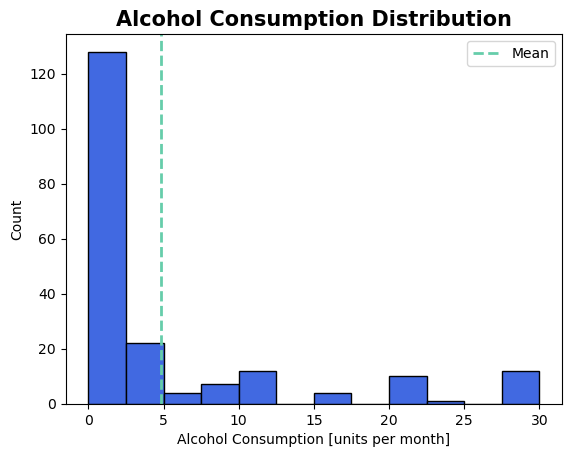

In [39]:
visualize_numeric('Alcohol_Consumption','Alcohol Consumption ', 12, 'units per month', 'royalblue')

<div dir="rtl" style="text-align: right;">
מההיסטוגרמה, נשים לב שרוב האנשים לא צורכים אלכוהול, או צורכים בכמות מעטה מאוד ביחידות של ליטרים בחודש. במקרה זה, לא נסיק שקיימים ערכים חריגים בצריכת האלכוהול, מאחר שהפיזור של הערכים השונים מ0 מאוזן באופן יחסי. ניתן לראות שהנתונים מגיעים ככל הנראה מהתפלגות עם זנב ימני ארוך, סיבה שגם במקרה זה גורמת להיסטוגרה להציג אותם בצורה טובה יותר מתצוגות אחרות.
</div>

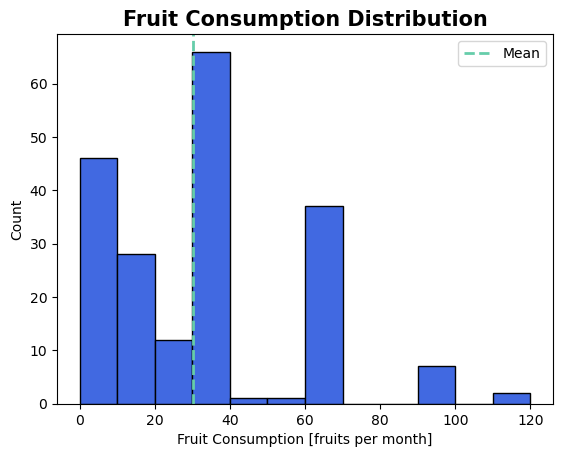

In [40]:
visualize_numeric('Fruit_Consumption','Fruit Consumption ', 12, 'fruits per month', 'royalblue')

<div dir="rtl" style="text-align: right;">

מההיסטוגרמה, עולה כי רוב האנשים צורכים כ30 פירות בחודש. קיימים מספר ערכי צריכה חריגים של כ80-120 פירות בחודש לאדם. קשה להעריך מאיזו התפלגות מגיעים הנתונים .



</div>

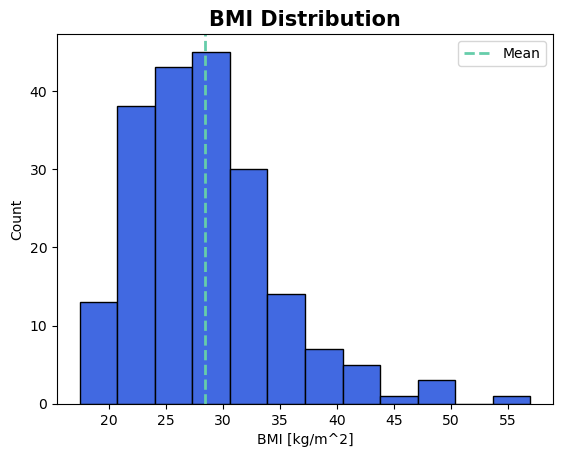

In [41]:
visualize_numeric('BMI','BMI ', 12, 'kg/m^2', 'royalblue')

<div dir="rtl" style="text-align: right;">

מההיסטוגרמה, נשים לב שרוב האנשים נמצאים בטווח של BMI שבין 25-30, כלומר מוגדרים ב''עודף משקל''. נשים לב שהערכים מתפלגים בצורה שמזכירה התפלגות א-סימטרית עם זנב ימני ארוך יותר מהשמאלי (כדוגמת התפלגות כי בריבוע למשל) ואופן הצגת הנתונים באופן היסטוגרמי מנדב מידע רב יותר כאשר בוחרים להסתכל על הBMI כמדד רציף ולא כמשתנה קטגוריאלי לפי תלות בקטגוריות סיווג המשקל השונות.



</div>

In [42]:
# build Table for the categorical variable 'Sex' with counts for male and female
sex_df=df_sample.groupby('Sex').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
# rename columns: 0 -> Female, 1 -> Male.
sex_df=sex_df.replace({1:'male',0: 'female'})
## Display the table
display(sex_df)

,Sex,Count
0,female,109
1,male,91


<div dir="rtl" style="text-align: right;">

מהטבלה, הכמויות כמעט שוות בין 2 המינים, לכן נוכל להסיק שהערכים הוגרלו מהתפלגות אחידה



</div>

<div dir="rtl" style="text-align: right;">
נשים לב כי אין לנו נתונים חסרים כיוון שהדאטה שאנחנו עובדים איתו הוא דאטה שניקינו בפרויקטים הקודמים.
</div>

### Part 1.3.c

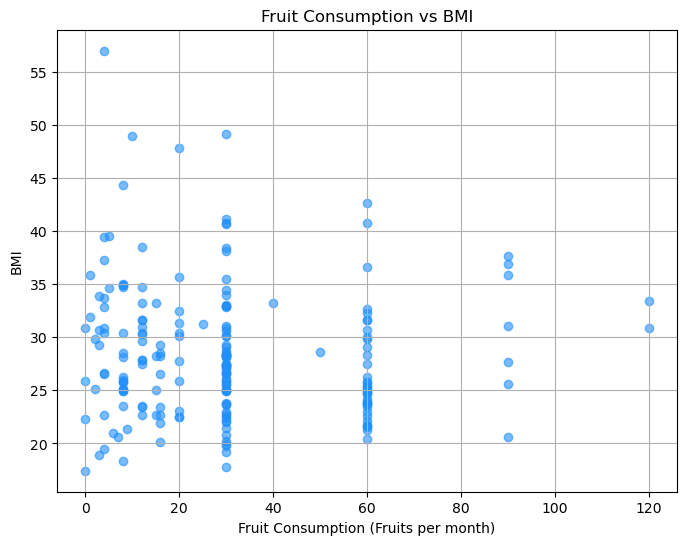

In [43]:
# plotting a graph of the categorical as a function of the continuous variable for each of the 3 continuous variables

## Defining a new funtction for the visualization
def plot_variable_vs_bmi(x, y, title, units):
    """
    This function plots fruit consumption vs BMI.
    
    :param x: A sequence of fruit consumption values.
    :param y: A sequence of BMI values.
    :param title: The title of the plot.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='dodgerblue', marker='o', alpha=0.6)
    plt.title(f"{title} vs BMI")
    plt.xlabel(f"{title} ({units})")
    plt.ylabel("BMI")
    plt.grid(True)
    plt.show()

## Plotting the BMI per Fruit consumption graph
fruit_consumption = df_sample['Fruit_Consumption'] 
bmi_values = df_sample['BMI']
plot_variable_vs_bmi(fruit_consumption, bmi_values, "Fruit Consumption", "Fruits per month")

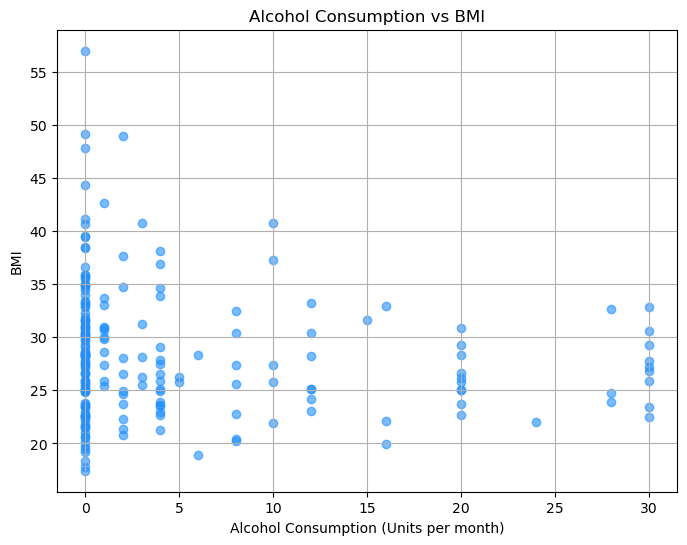

In [44]:
## Plotting the BMI per Alcohol consumption graph
alcohol_consumption = df_sample['Alcohol_Consumption'] 
bmi_values = df_sample['BMI']
plot_variable_vs_bmi(alcohol_consumption, bmi_values, "Alcohol Consumption", "Units per month")

In [45]:
# Calculate the correlation coefficient for the 2 pairs of variables with Spearman's method and p-value.
## Correlation coefficient for Fruit Consumption and BMI
fruit_bmi_corr, fruit_bmi_pval = stats.spearmanr(fruit_consumption, bmi_values)
print(f"The Spearman correlation coefficient between Fruit Consumption and BMI is {fruit_bmi_corr:.2f}, with a p-value of {fruit_bmi_pval:.2f}")


## Correlation coefficient for Alcohol Consumption and BMI
alcohol_bmi_corr, alcohol_bmi_pval = stats.spearmanr(alcohol_consumption, bmi_values)
print(f"The Spearman correlation coefficient between Alcohol Consumption and BMI is {alcohol_bmi_corr:.2f}, with a p-value of {alcohol_bmi_pval:.2f}")

The Spearman correlation coefficient between Fruit Consumption and BMI is -0.09, with a p-value of 0.22
The Spearman correlation coefficient between Alcohol Consumption and BMI is -0.12, with a p-value of 0.08


<div dir="rtl" style="text-align: right;">

ניתן להסיק מהגרפים כי הנתונים מאוד מפוזרים ולא עוקבים אחרי מגמת עלייה או ירידה לינארית כללית. מתוצאות מבחן ספירמן לקשר בין משתנים רציפים, נסיק כי אין קשר בין 2 המשתנים, גם עבור צריכת האלכוהול והBMI וגם עבור צריכת הפירות והBMI.
לפי הp-val, לא נדחה את השערת ה0 בכל רמת מובהקות סבירה, כלומר אין קשר בין המשתנים על פי השערת האפס במבחן ספירמן.



</div>

### Part 1.3.d

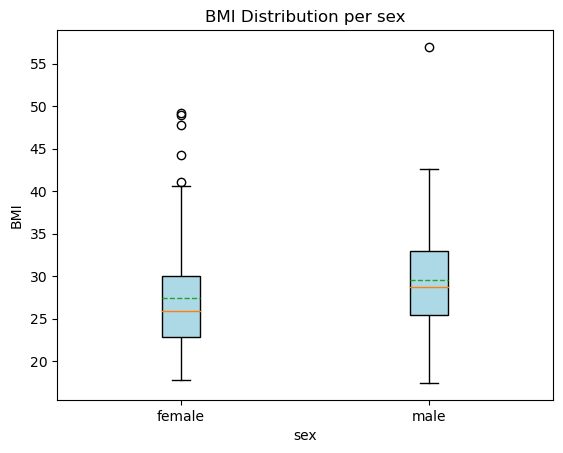

In [46]:
# Plot a boxplot for the continuous variable 'BMI' as a function of the categorical variable 'sex'.
## Plotting the boxplot
plt.boxplot([df_sample[df_sample['Sex']==0]['BMI'], df_sample[df_sample['Sex']==1]['BMI']], labels=['female', 'male'], showmeans=True, meanline=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('BMI Distribution per sex')
plt.ylabel('BMI')
plt.xlabel('sex')
plt.show()

# plotting 2 histograms on one plot for the continuous variable 'BMI' as a function of male and female.
## Plotting the histograms



<div dir="rtl" style="text-align: right;">

ניתן לראות מהתרשים כי החציון והממוצע של BMI של גברים גבוה יותר מאשר נשים ויש יותר ערכים חריגים עבור נשים.
ניתן לראות שהBMI של גברים מפולג באופן שהוא יחסית סימטרי עם שונות שווה מכל צד של הממוצע ואילו עבור הנשים יש זנב ימני וההתפלגות ככל הנראה לא סימטרית.
לא בחרנו להציג היסטוגרמה שכן הזנב בהתפלגות BMI של נשים לא ארוך מדי ולכן היסטוגרמה לא תוכל להוסיף מידע נוסף שלא נוכל למצות מתוך הbox-plot



</div>

## Part 1.4
    Calculating the coefficients vector beta for the Linear regression

In [47]:
# calculate the coeeficients vector beta for the linear regression model BMI ~ Alcohol Consumption, Fruit Consumption, Sex.

# Split data into features and target
X=df_sample[['Alcohol_Consumption','Fruit_Consumption', 'Sex']]
# Adapt the target to the logistic regression
y=df_sample['BMI']
# Adding column of ones to the features
X=X.assign(ones=1)

# Convert the data to numpy arrays
X = X.values
y = y.values
y=y.reshape([y.shape[0],]) # Reshape y to 1D array

# Calculate the coefficients vector beta
beta = np.linalg.inv(X.T @ X) @ X.T @ y # b = (X^T * X)^-1 * X^T * y
print(f"The coefficients vector beta for the linear regression model BMI ~ X1:Alcohol Consumption , X2:Fruit Consumption, X3:Sex is: {beta}")
print(f'The regression model is: y={beta[0]}*X1 + {beta[1]}*X2 + {beta[2]}*X3 + {beta[3]}')



The coefficients vector beta for the linear regression model BMI ~ X1:Alcohol Consumption , X2:Fruit Consumption, X3:Sex is: [-8.57990328e-02 -1.11878202e-02  1.95056386e+00  2.83024281e+01]
The regression model is: y=-0.08579903284792036*X1 + -0.01118782018341976*X2 + 1.950563857302633*X3 + 28.30242808086157


<div dir="rtl" style="text-align: right;">
 השפעת הערכים המסבירים:

*   **Alcohol_consumption':** אם נעלה את צריכת האלכוהול ביחידה אחת ולא נשנה את שאר המשתנים המסבירים, ערך המשתנה המוסבר יקטן ב0.0858 יחידות.

*   **Fruit_consumption':** אם נעלה את צריכת הפירות ביחידה אחת ולא נשנה את שאר המשתנים המסבירים, ערך המשתנה המוסבר יקטן ב0.0112

*   **Sex:** משתנה בינארי - מקבל ערכים של 0 או 1, לכן אם נעלה את המשתנה של מין ביחידה אחת (מ0 ל-1 כלומר מנקבה לזכר) בלי לשנות את שאר המשתנים המסבירים, ערך המשתנה המוסבר יעלה ב1.95.

</div>


## Part 1.5
    ANOVA table, F statistic, R and R_adj

In [48]:
# Filling the ANOVA table
n=y.shape[0]
p=X.shape[1]

Y_hat = X @ beta # Predicted values
SSR= np.sum((Y_hat-np.mean(y))**2) # Sum of squares due to Regression
SSE= np.sum((y-Y_hat)**2) # Sum of squares due to Error
SST= SSR + SSE # Total Sum of squares
df_Regression = p-1 # degrees of freedom for Regression
df_Error = n-p # degrees of freedom for Error
df_Total = n-1 # degrees of freedom for Total

MSR= SSR/df_Regression # Mean Square for Regression

MSE= SSE/df_Error # Mean Square for Error
MST = SST/df_Total # Mean Square for Total
F= MSR/MSE # F-statistic
p_value = 1 - stats.f.cdf(F, df_Regression, df_Error) # p-value for the F-statistic
# Creating the ANOVA table
ANOVA_table = pd.DataFrame({'Source of Variation':['Regression','Error','Total'],'Sum of Squares':[SSR,SSE,SST],'Degrees of Freedom':[df_Regression,df_Error,df_Total],'Mean Square':[MSR,MSE,MST],'F-statistic':[F,np.nan,np.nan]})
ANOVA_table.head()


,Source of Variation,Sum of Squares,Degrees of Freedom,Mean Square,F-statistic
0,Regression,336.539413,3,112.179804,3.000413
1,Error,7328.072187,196,37.388123,NaN
2,Total,7664.611600,199,38.515636,NaN


In [49]:
R_squared = SSR / SST
R_squared_adjusted = 1-(MSE/MST)
print(f"The R-squared for the linear regression model BMI ~ (Alcohol Consumption, Fruit Consumption, Sex) is: {R_squared:.2f}")
print(f"The adjusted R-squared for the linear regression model BMI ~ (Alcohol Consumption, Fruit Consumption, Sex) is: {R_squared_adjusted:.2f}")
print(f"The F-statistic for the linear regression model BMI ~ (Alcohol Consumption, Fruit Consumption, Sex) is: {F:.2f}, with a p-value of {p_value}")


The R-squared for the linear regression model BMI ~ (Alcohol Consumption, Fruit Consumption, Sex) is: 0.04
The adjusted R-squared for the linear regression model BMI ~ (Alcohol Consumption, Fruit Consumption, Sex) is: 0.03
The F-statistic for the linear regression model BMI ~ (Alcohol Consumption, Fruit Consumption, Sex) is: 3.00, with a p-value of 0.03173935980721376


## Part 1.6
    Confidence intervals for the Regression coefficients and calculations of beta for the complete dataset

In [50]:
# A boolean function to recognize if the coefficient estimation is in the CI
def is_in_CI(CI, beta):
    """
    This function checks if the coefficient estimation is in the confidence interval.
    
    :param CI: A list of the confidence interval.
    :param beta: The coefficient estimation.
    :return: A boolean value.
    """
    return CI[0] <= beta <= CI[1]

In [102]:
# Calculating the confidence intervals for the coefficients vector beta for the linear regression model BMI ~ (Alcohol Consumption, Fruit Consumption, Sex) with confidence level of 95%.
residuals = y - Y_hat # Residuals
# Calculate the standard error of the coefficients
sigma = np.sqrt(np.sum(residuals**2)/(n-p)) # Residual standard error
C = np.linalg.inv(X.T @ X) # Covariance matrix
SE = np.sqrt(np.diag(C))*sigma # Standard errors
# Calculate the t-statistics
t = beta/SE # t-statistics
# Calculate the p-values
p_value = 2*(1 - stats.t.cdf(np.abs(t), df_Error)) # p-values





In [52]:

#calculate the beta coeffient on the full dataset
# Split data into features and target
X_full=df[['Alcohol_Consumption','Fruit_Consumption', 'Sex']]
Y_full=df['BMI']
# Adding column of ones to the features
X_full=X_full.assign(ones=1) 
# Convert the data to numpy arrays
X_full = X_full.values
Y_full = Y_full.values
Y_full=Y_full.reshape([Y_full.shape[0],]) # Reshape y to 1D array

# Calculate the coefficients vector beta
beta_full = np.linalg.inv(X_full.T @ X_full) @ X_full.T @ Y_full # b = (X^T * X)^-1 * X^T * y
print(f"The coefficients vector beta based on the complete data for the linear regression model BMI ~ X1:Alcohol Consumption , X2:Fruit Consumption, X3:Sex is: {beta_full}")
print(f'The regression model is: y={beta_full[0]}*X1 + {beta_full[1]}*X2 + {beta_full[2]}*X3 + {beta_full[3]}')



The coefficients vector beta based on the complete data for the linear regression model BMI ~ X1:Alcohol Consumption , X2:Fruit Consumption, X3:Sex is: [-8.91069324e-02 -2.00095994e-02  2.40399772e-01  2.95616130e+01]
The regression model is: y=-0.08910693238490569*X1 + -0.020009599368106937*X2 + 0.24039977209379837*X3 + 29.561612957195074


In [53]:
se_alcohol=SE[0]
se_fruit=SE[1]
se_sex=SE[2]
#calculate the confidence intervals for beta_j with confidence level of 95%
CI_alcohol=[beta[0]-stats.t.ppf(0.975, df_Error)*se_alcohol, beta[0]+stats.t.ppf(0.975, df_Error)*se_alcohol]
CI_fruit=[beta[1]-stats.t.ppf(0.975, df_Error)*se_fruit, beta[1]+stats.t.ppf(0.975, df_Error)*se_fruit]
CI_sex=[beta[2]-stats.t.ppf(0.975, df_Error)*se_sex, beta[2]+stats.t.ppf(0.975, df_Error)*se_sex]
print(f"The 95% confidence interval for the coefficient of Alcohol Consumption is: {CI_alcohol}")
print(f"Is the coefficient estimation based on the complete data in the confidence interval? {is_in_CI(CI_alcohol, beta_full[0])}")
print(f"The 95% confidence interval for the coefficient of Fruit Consumption is: {CI_fruit}")
print(f"Is the coefficient estimation based on the complete data in the confidence interval? {is_in_CI(CI_fruit, beta_full[1])}")
print(f"The 95% confidence interval for the coefficient of Sex is: {CI_sex}")
print(f"Is the coefficient estimation based on the complete data in the confidence interval? {is_in_CI(CI_sex, beta_full[2])}")


The 95% confidence interval for the coefficient of Alcohol Consumption is: [-0.1891685249927894, 0.017570459296948684]
Is the coefficient estimation based on the complete data in the confidence interval? True
The 95% confidence interval for the coefficient of Fruit Consumption is: [-0.04713484604014679, 0.02475920567330727]
Is the coefficient estimation based on the complete data in the confidence interval? True
The 95% confidence interval for the coefficient of Sex is: [0.22702967053080503, 3.674098044074461]
Is the coefficient estimation based on the complete data in the confidence interval? True


## Part 1.7
    Wald test for the sample coefficients

<div dir="rtl" style="text-align: right;">
נשתמש במבחן וולד על מקדמי הרגרסיה כפי שראינו בכיתה:
</div>

<br> $H_0: \beta_j = 0 \quad \forall j \in \{1,2,3\}$

$H_1: \beta_j \neq 0 \quad \forall j \in \{1,2,3\}$

$T.S.: W = \frac{(\hat{\beta}_j - \beta_j)}{\hat{s.e}}$

$R.R.: |W| > z_{\alpha/2}$ </br>

In [54]:
def wald_test(beta, SE):
    """
    This function calculates the Wald test for the coefficients.
    
    :param beta: The coefficient estimation.
    :param SE: The standard error.
    :return: The Wald test statistic and the p-value.
    """
    Wald_statistic = beta/SE # Wald test statistic
    wald_test_quantile = stats.norm.ppf(0.975) # Wald test quantile for 95% confidence level
    Wald_p_value = 2*stats.norm.cdf(-abs(Wald_statistic)) # Wald test p-value
    return Wald_statistic, wald_test_quantile, Wald_p_value



print()
def print_results(Wald_statistic, wald_test_quantile, Wald_p_value):
    print("Wald statistic for test is: W="+ str(Wald_statistic))
    print("Wald test quantile: z=" + str(wald_test_quantile))
    print("P value: " +  str(Wald_p_value))
    print("is in Rejection zone? "  + str(abs(Wald_statistic)>wald_test_quantile))


Wald_statistic_alcohol, wald_test_quantile_alcohol, Wald_p_value_alcohol = wald_test(beta[0], SE[0])
print("Wald test for Alcohol Consumption coefficent:")
print_results(Wald_statistic_alcohol, wald_test_quantile_alcohol, Wald_p_value_alcohol)
print()
wald_statistic_fruit, wald_test_quantile_fruit, Wald_p_value_fruit= wald_test(beta[1], SE[1])
print("Wald test for Fruit Consumption coefficent:")
print_results(wald_statistic_fruit, wald_test_quantile_fruit, Wald_p_value_fruit)
print()
wald_statistic_sex, wald_test_quantile_sex, Wald_p_value_sex= wald_test(beta[2], SE[2])
print("Wald test for Sex coefficent:")
print_results(wald_statistic_sex, wald_test_quantile_sex, Wald_p_value_sex)





Wald test for Alcohol Consumption coefficent:
Wald statistic for test is: W=-1.6369221319261353
Wald test quantile: z=1.959963984540054
P value: 0.10164674088430051
is in Rejection zone? False

Wald test for Fruit Consumption coefficent:
Wald statistic for test is: W=-0.6137910115895507
Wald test quantile: z=1.959963984540054
P value: 0.5393534376372826
is in Rejection zone? False

Wald test for Sex coefficent:
Wald statistic for test is: W=2.231918239852666
Wald test quantile: z=1.959963984540054
P value: 0.02562036714047716
is in Rejection zone? True


<div dir="rtl" style="text-align: right;">
מהמבחן ניתן לראות כי נדחה את השערת האפס רק עבור המקדם של "Sex". כלומר, מהמבחן הכולל שניסחנו, כיוון שלא כל המקדמים שווים לאפס, נדחה את השערת האפס ברמת בטחון 95%.
</div>

## Part 1.8
    Checking if the Linear model assumptions hold

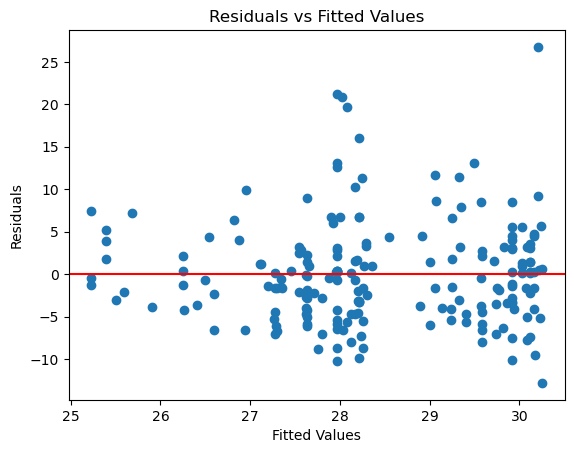

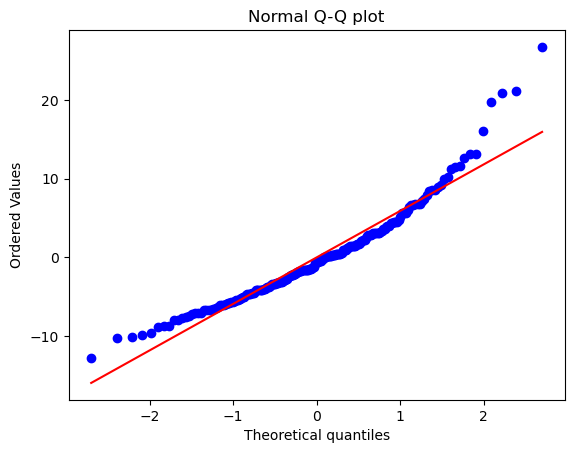

In [55]:
import scipy.stats as stats
# Checking the linear model assumptions : Linearity, Homoscedasticity, Independence of errors, Normality of errors.

# Linearity and Homoscedasticity will be checked by using residual analysis
plt.scatter(Y_hat,residuals) # calculated residuals before
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(y=0, color='r', linestyle='-') # plotting the line y=0 on the graph
plt.show()

# Checking the Normality of errors using a Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.show()


<div dir="rtl" style="text-align: right;">
   

*   **הומוקסקדסטיות:** ניתן לראות מגרף השאריות כי הנקודות מפוזרות באופן יחסית שווה ביחס לישר y=0, כך שההנחה של הומוסקדסטיות מתקיימת. (הנחת שיוויון שונויות סבירה).

*   **לינאריות:** יש מספר שווה של נקודות מכל צד של הישר y=0 ובערך באותו קו, כך שההפרשים בין הנקודות "מתבטלים", ולכן הנחת הלינאריות מתקיימת.
*   **נורמליות:** מהQQ-plot נוכל להניח בבטחה שהרעש מגיע מהתפלגות נורמלית.

</div>

## Part 1.9
    Calculating predictions, CI and CI percentage for a 1000 sized sample excludng the previous 200 sized sample.

### Part 1.9.A
    Predicting the point's value given X_new

In [56]:
df_full=df
df_full.head()
sampled_indices = df_sample.index
reduced_df = df_full.drop(sampled_indices) # get rid of the 200 samples we've worked with until now for this df.
#sample 1000 from the reduced data
np.random.seed(314)
reduced_df_sample = reduced_df.sample(1000) # sample 1000 from the reduced data.
reduced_df_sample.head()

,Unnamed: 0,Heart_Disease,Sex,Depression,BMI,FriedPotato_Consumption,Alcohol_Consumption,Fruit_Consumption
173569,173569,0,0,0,39.48,1.0,0.0,30.0
10290,10290,0,1,1,27.37,4.0,0.0,5.0
113204,113204,1,0,1,30.13,12.0,0.0,4.0
116379,116379,0,1,0,26.39,1.0,8.0,8.0
282397,282397,0,0,0,21.97,4.0,0.0,30.0


In [57]:
# predicting the y values for the reduced data by applying the coefficients vector beta on given X values
X_new = reduced_df_sample[['Alcohol_Consumption', 'Fruit_Consumption', 'Sex']].assign(ones=1).values
y_pred = X_new @ beta


### Part 1.9.B+C    
    Calculating the confidence intervals for Y_new and checking the appearance percentage

In [58]:
# Calculating the confidence intervals for the predicted values of the reduced data based on the 200 poinys data
# Calculate the standard error of the predicted values
C = np.linalg.inv(X.T @ X) # Covariance matrix
print(X.shape)
n = 1000
p = 3
#calculate sigma for the y new 
y_new = reduced_df_sample['BMI'].values 
residuals_new = y_new - y_pred # Residuals
variance = np.sum(residuals_new**2)/(n-p) # Residual standard error
# Calculate the standard error of the predicted values
sqrt_SE_new_var = np.sqrt(np.sum(X_new @ C_new * X_new, axis=1) * variance +  variance) # Square of Standard errors + variance
# calculate the precantage of the times that the true value is in the confidence interval
CI_new = np.column_stack((y_pred - stats.t.ppf(0.975, df_Error)*sqrt_SE_new_var, y_pred + stats.t.ppf(0.975, df_Error)*sqrt_SE_new_var))
print(CI_new)
percentage = np.mean((CI_new[:,0] <= y_new) & (y_new <= CI_new[:,1]))*100
print(f"The percentage of the times that the true value is in the confidence interval is: {percentage:.2f}%")

(200, 4)
[[14.71398024 41.21960671]
 [16.90635269 43.48775298]
 [14.96166988 41.55368372]
 ...
 [16.32486669 42.82345571]
 [16.66080804 43.17390663]
 [14.71398024 41.21960671]]
The percentage of the times that the true value is in the confidence interval is: 95.30%


<div dir="rtl" style="text-align: right;">
כפי שראינו בסעיפים הראשונים מההיסטוגרמה על משתנה הBMI - ניתן להניח שהוא מגיע מהתפלגות עם תוחלת בין 25 ל30 והרוב המוחלט של הנתונים נמצאים בטווח שבין 20 ל35 כאשר BMI שהוא מתחת ל18.5 מוגדר כ"תת-משקל" ו40 ומעלה מוגדל כ"השמנה דרגה 3" (והמקס'), כך שערכים אלה הם לא ערכים שכיחים במיוחד בדאטה.
רווחי הסמך שקיבלנו רחבים מאוד (בין כ14 לכ44), ולכן מצליחים ''לחזות'' נכונה את הערך האמיתי כתוצאה מכך. הדבר לא מעיד בהכרח על טיב המודל, שכן רווחי הסמך לוכדים את טווח הBMI של הרוב המחולט של הדגימות בדאטה.



</div>

## Part 1.10
    Adding the first degree interaction to the Linear model

In [59]:
# Adding the new explaining variables Z12, Z13, Z23
X1= df_sample['Alcohol_Consumption'].values
X2= df_sample['Fruit_Consumption'].values
X3 = df_sample['Sex'].values
Z12 = X1*X2
Z13 = X1*X3
Z23 = X2*X3
# Estimating the coefficients vector beta for the linear regression model BMI ~ (X1, X2, X3, Z12, Z13, Z23)
X_inter = np.column_stack((X1, X2, X3, Z12, Z13, Z23, np.ones(X1.shape[0])))
y = df_sample['BMI'].values
beta_inter = np.linalg.inv(X_inter.T @ X_inter) @ X_inter.T @ y
print(f"The coefficients vector beta for the linear regression model BMI ~ (X1, X2, X3, Z12, Z13, Z23) is: {beta_inter}")
print(f'The regression model is: y={beta_inter[0]}*X1 + {beta_inter[1]}*X2 + {beta_inter[2]}*X3 + {beta_inter[3]}*Z12 + {beta_inter[4]}*Z13 + {beta_inter[5]}*Z23 + {beta_inter[6]}')

The coefficients vector beta for the linear regression model BMI ~ (X1, X2, X3, Z12, Z13, Z23) is: [-9.71405082e-02 -3.10885468e-02  1.04411078e+00  8.90857877e-04
 -4.27329062e-02  3.69453473e-02  2.88287931e+01]
The regression model is: y=-0.09714050823257527*X1 + -0.031088546818765866*X2 + 1.0441107793041176*X3 + 0.0008908578766632425*Z12 + -0.04273290622332809*Z13 + 0.036945347288725915*Z23 + 28.828793122533256


<div dir="rtl" style="text-align: right;">
נשתמש בשתי שיטות לבחירת מודל שראינו בכיתה:


1.   **בחירת מודל על סמך  R^2_adj:**  -  כשכמות המשתנים גדולה, ערכו יקטן וזה ה"עונש" שיש עבור מודל על הרבה פרמטרים. מודל עם R^2_adj קרוב יותר ל1 יהיה מודל טוב יותר. 
2.   **בחירת מודל לפי סטטיסטי Mallow:** ראינו בתרגול כי נרצה למזער את המדד המתקבל ממבחן זה. לכן מודל עם סטטיסטי נמוך יותר, יהיה מודל טוב יותר.


</div>

In [60]:
# Comparing the models

## First method: R^2_adj
## R^2_adj for the first model
R_squared_adjusted = 1-(MSE/MST)
print(f"The adjusted R-squared for the linear regression model BMI ~ (X1, X2, X3) is: {R_squared_adjusted}")
## R^2_adj for the second model
Y_hat_inter = X_inter @ beta_inter # Predicted values
SSR_inter= np.sum((Y_hat_inter-np.mean(y))**2) # Sum of squares due to Regression
SSE_inter= np.sum((y-Y_hat_inter)**2) # Sum of squares due to Error
SST_inter= SSR_inter + SSE_inter # Total Sum of squares
df_Regression_inter = 6 # degrees of freedom for Regression
df_Error_inter = n-7 # degrees of freedom for Error
df_Total_inter = n-1 # degrees of freedom for Total
MSR_inter= SSR_inter/df_Regression_inter # Mean Square for Regression
MSE_inter= SSE_inter/df_Error_inter # Mean Square for Error
MST_inter = SST_inter/df_Total_inter # Mean Square for Total

R_squared_adjusted_inter = 1-(MSE_inter/MST_inter)
print(f"The adjusted R-squared for the linear regression model BMI ~ (X1, X2, X3, Z12, Z13, Z23) is: {R_squared_adjusted_inter}")




The adjusted R-squared for the linear regression model BMI ~ (X1, X2, X3) is: 0.029274156970552245
The adjusted R-squared for the linear regression model BMI ~ (X1, X2, X3, Z12, Z13, Z23) is: 0.043875858628728004


In [61]:
### Second method: Mallows' Cp
### Mallows' Cp for the first model
S1 = 3 # number of explaining variables coefficients in the first model
MSE1 = MSE # Mean Square for Error
Cp = SSE + 2*S1*MSE # Mallows' Cp
print(f"Mallows' Cp for the linear regression model BMI ~ (X1, X2, X3) is: {Cp}")
### Mallows' Cp for the second model
S2 = 6 # number of explaining variables coefficients in the second model
MSE2 = MSE_inter # Mean Square for Error
Cp_inter = SSE_inter + 2*S2*MSE2 # Mallows' Cp
print(f"Mallows' Cp for the linear regression model BMI ~ (X1, X2, X3, Z12, Z13, Z23) is: {Cp_inter}")


Mallows' Cp for the linear regression model BMI ~ (X1, X2, X3) is: 7552.400927107853
Mallows' Cp for the linear regression model BMI ~ (X1, X2, X3, Z12, Z13, Z23) is: 7372.3341200392815


<div dir="rtl" style="text-align: right;">
על סמך שתי השיטות, נעדיף לבחור במודל האינטראקציות על פני המודל הראשון. עם זאת, נבחין כי ערכי הR^2_adj יצאו נמוכים מאוד, דבר שעשוי להעיד על כך שהמודל הלינארי לא מתאים כדי להסביר את הקשר בין המשתנים המסבירים שבחרנו לבין המשתנה המוסבר.
</div>

# Part 2 - Logistic Regression

## Part 2.1
    Defining the Hypothesis

<div dir="rtl" style="text-align: right;">
 שאלת המחקר: כיצד משפיעים מין, צריכת אלכוהול חודשית וצריכת פירות חודשית על התרחשות מחלות לב?
</div>

## Part 2.2
    Sampling a 200 sized data for the rest of the question


In [62]:
# Same as Part 1.2
# Load the data
df = pd.read_csv('df_for_proj (1).csv')

df.head()

# Picking a random sample of 200 rows.
np.random.seed(314)
df_sample_logistic = df.sample(200)
df_sample_logistic.head()

,Unnamed: 0,Heart_Disease,Sex,Depression,BMI,FriedPotato_Consumption,Alcohol_Consumption,Fruit_Consumption
143684,143684,0,0,0,19.20,4.0,0.0,30.0
18803,18803,0,0,0,24.75,0.0,28.0,60.0
244431,244431,0,0,1,47.77,1.0,0.0,20.0
120543,120543,0,0,0,28.19,2.0,0.0,16.0
142511,142511,0,1,0,37.30,3.0,10.0,4.0


## Part 2.3 
    Data visualization and analysis

### Part 2.3.a+b
    Histogram for continuous variables and a table for the categorial variables

<div dir="rtl" style="text-align: right;">
המשתנה היחיד ששינינו הואמחלות לב, לכן נכתוב עבורו טבלה.



</div>

In [63]:
# Build a table for the categorial variable 'heart_disease' with counts for the different values
heart_disease_df=df_sample_logistic.groupby('Heart_Disease').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
# rename columns: 0 -> No, 1 -> Yes.
heart_disease_df=heart_disease_df.replace({1:'Yes',0: 'No'})
## Display the table
display(heart_disease_df)

,Heart_Disease,Count
0,No,190
1,Yes,10


<div dir="rtl" style="text-align: right;">

מהטבלה, הכמויות מאוד שונות, לכן ההתפלגות שנלקחו ממנה הנתונים אינה סימטרית, עם רוב לאנשים שלא לקו במחלת לב. לא נוכל להסיק באופן חד משמעי מאיזו התפלגות נלקחו הנתונים.



</div>

<div dir="rtl" style="text-align: right;">
נשים לב כי אין לנו נתונים חסרים כיוון שהדאטה שאנחנו עובדים איתו הוא דאטה שניקינו בפרויקטים הקודמים.
</div>

### Part 2.3.c
    Plots of X against Y for each continuous explaining variable

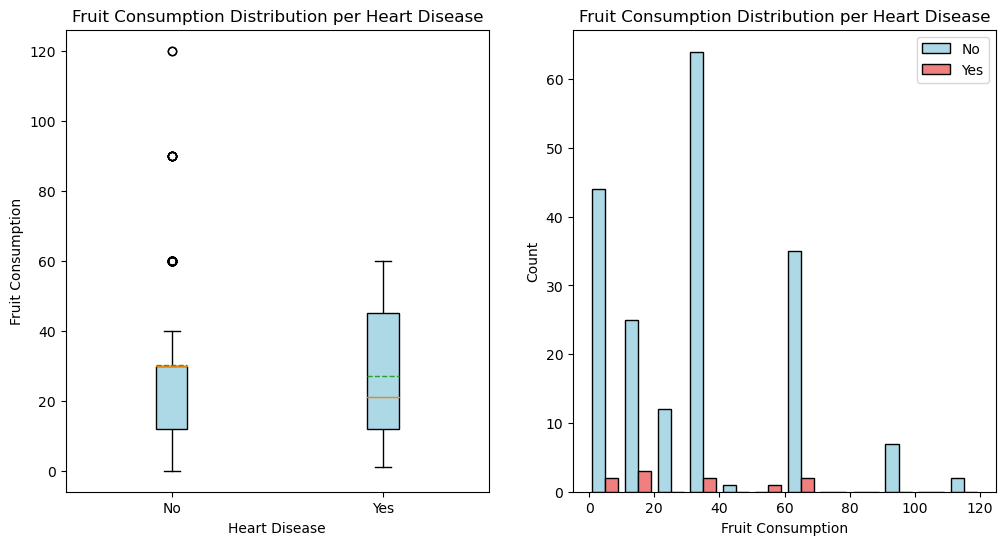

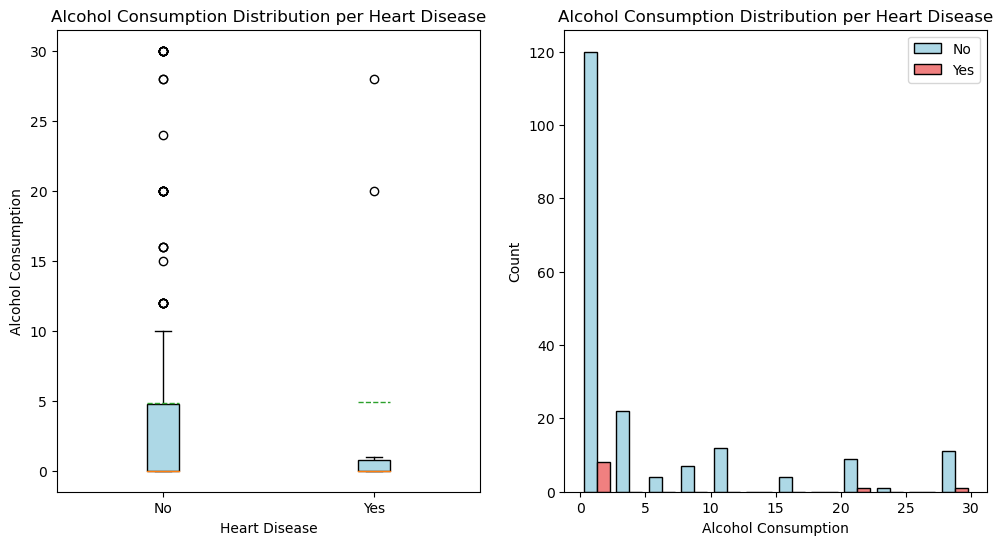

In [64]:
# defining a function to plot a hist and a boxplot side by side
def plot_hist_and_boxplot(x, y, variable, title, units):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].boxplot([df_sample_logistic[df_sample_logistic['Heart_Disease']==0][variable], df_sample_logistic[df_sample_logistic['Heart_Disease']==1][variable]], labels=['No', 'Yes'], showmeans=True, meanline=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axs[0].set_title(f'{title} Distribution per Heart Disease')
    axs[0].set_ylabel(f'{title}')
    axs[0].set_xlabel('Heart Disease')
    axs[1].hist([df_sample_logistic[df_sample_logistic['Heart_Disease']==0][variable], df_sample_logistic[df_sample_logistic['Heart_Disease']==1][variable]], bins=12, color=['lightblue', 'lightcoral'], edgecolor = "black", label=['No', 'Yes'])
    axs[1].set_title(f'{title} Distribution per Heart Disease')
    axs[1].set_xlabel(f'{title}')
    axs[1].set_ylabel('Count')
    axs[1].legend()
    plt.show()

# Plotting the boxplot and hist side by side for the continuous variables as a function of the categorical variable 'heart_disease'.
## Fruit Consumption
plot_hist_and_boxplot('Fruit_Consumption', 'Heart_Disease', 'Fruit_Consumption', 'Fruit Consumption', 'Fruits per month')

## Alcohol Consumption
plot_hist_and_boxplot('Alcohol_Consumption', 'Heart_Disease', 'Alcohol_Consumption', 'Alcohol Consumption', 'Units per month')


<div dir="rtl" style="text-align: right;">
   
ניתן לראות מהboxplot עבור 2 המשתנים, כי עבור צריכת אלכוהול יש יותר ערכים חריגים, שמתבטאים בזנב ימני ארוך. נשים לב שעבור צריכת אלכוהול, יש שינוי קיצוני בין אוכ' הלוקים במחלת לב לאלה שלא, לעומת משתנה צריכת הפירות. ולכן נוכל להסיק כי צריכת אלכוהול משפיעה יותר על התרחשות מחלת לב.
</div>

## Part 2.4
    Calculating the coefficients vector beta for the Logistic regression

In [65]:
from sklearn.linear_model import LogisticRegression
# calculate the coeeficients vector beta for the logistic regression model Heart Disease ~ (Alcohol Consumption, Fruit Consumption, Sex).
# Split data into features and target
X_logistic = df_sample_logistic[['Alcohol_Consumption','Fruit_Consumption', 'Sex']].assign(ones=1).to_numpy()
# Adapt the target to the logistic regression
y_logistic = df_sample_logistic['Heart_Disease'].to_numpy()

model = LogisticRegression(penalty = 'none', fit_intercept = False)
model.fit(X_logistic, y_logistic)
beta_logistic = model.coef_[0]
print(beta_logistic)

print(f"The coefficients vector beta for the logistic regression model Heart Disease ~ (X1, X2, X3) and intercept is: {beta_logistic}") # X1:Alcohol Consumption , X2:Fruit Consumption, X3:Sex
# the change if x_i will increase by 1 will be exp(beta_i)
# for alcohol consumption
print(f"The change if x1 will increase by 1 is: {np.exp(beta_logistic[0])}")
# for fruit consumption
print(f"The change if x2 will increase by 1 is: {np.exp(beta_logistic[1])}")
# for sex
print(f"The change if x3 will increase by 1 is: {np.exp(beta_logistic[2])}")





[ 0.00479649 -0.00545144  0.61500588 -3.13397995]
The coefficients vector beta for the logistic regression model Heart Disease ~ (X1, X2, X3) and intercept is: [ 0.00479649 -0.00545144  0.61500588 -3.13397995]
The change if x1 will increase by 1 is: 1.0048080121658616
The change if x2 will increase by 1 is: 0.9945633917799962
The change if x3 will increase by 1 is: 1.8496674717856458


## Part 2.5
    Confidence intervals for the Regression coefficients and calculations of beta for the complete dataset

In [66]:
# Calculating beta based on the complete data for the logistic regression model Heart Disease ~ (Alcohol Consumption, Fruit Consumption, Sex).
# Split data into features and target
X_full_logistic = df[['Alcohol_Consumption','Fruit_Consumption','Sex']].assign(ones=1).to_numpy()
y_full_logistic = df['Heart_Disease'].to_numpy()

model_full = LogisticRegression(penalty = 'none', fit_intercept = False)
model_full.fit(X_full_logistic, y_full_logistic)
beta_full_logistic = model_full.coef_[0]
print(f"The coefficients vector beta based on the complete data for the logistic regression model Heart Disease ~ (X1, X2, X3) and intercept is: {beta_full_logistic}") # X1:Alcohol Consumption , X2:Fruit Consumption, X3:Sex.

The coefficients vector beta based on the complete data for the logistic regression model Heart Disease ~ (X1, X2, X3) and intercept is: [-2.32343456e-02 -2.08557695e-03  5.73678165e-01 -2.57138944e+00]


In [67]:
# Calculating the confidence intervals for the coefficients vector beta for the logistic regression model Heart Disease ~ (Alcohol Consumption, Fruit Consumption, Sex) with confidence level of 95%.

pi = model.predict_proba(X_logistic)[:,1] # Predicted probabilities
n = y_logistic.shape[0]
p = X_logistic.shape[1]
# Calculate the standard error of the coefficients
C_logistic = np.linalg.inv(X_logistic.T @ np.diag(pi*(1-pi)) @ X_logistic) # Covariance matrix for the logistic regression 
SE_logistic = np.sqrt(np.diag(C_logistic)) # Standard errors

# Calculate the z-quanitle for 95% confidence level
z = stats.norm.ppf(0.975) # z-quanitle for 95% confidence level
# Calculate the confidence intervals
se_alcohol_logistic= SE_logistic[0]
se_fruit_logistic= SE_logistic[1]
se_sex_logistic= SE_logistic[2]
#calculate the confidence intervals for beta_j with confidence level of 95%
CI_alcohol_logistic = [beta_logistic[0]-z*se_alcohol_logistic, beta_logistic[0]+z*se_alcohol_logistic]
CI_fruit_logistic = [beta_logistic[1]-z*se_fruit_logistic, beta_logistic[1]+z*se_fruit_logistic]
CI_sex_logistic = [beta_logistic[2]-z*se_sex_logistic, beta_logistic[2]+z*se_sex_logistic]
print(f"The 95% confidence interval for the coefficient of Alcohol Consumption is: {CI_alcohol_logistic}")
print(f"Is the coefficient estimation based on the complete data in the confidence interval? {is_in_CI(CI_alcohol_logistic, beta_full_logistic[0])}")
print(f"The 95% confidence interval for the coefficient of Fruit Consumption is: {CI_fruit_logistic}")
print(f"Is the coefficient estimation based on the complete data in the confidence interval? {is_in_CI(CI_fruit_logistic, beta_full_logistic[1])}")
print(f"The 95% confidence interval for the coefficient of Sex is: {CI_sex_logistic}")
print(f"Is the coefficient estimation based on the complete data in the confidence interval? {is_in_CI(CI_sex_logistic, beta_full_logistic[2])}")


The 95% confidence interval for the coefficient of Alcohol Consumption is: [-0.07251070434915655, 0.08210368553153585]
Is the coefficient estimation based on the complete data in the confidence interval? True
The 95% confidence interval for the coefficient of Fruit Consumption is: [-0.034303201080000616, 0.023400320366849366]
Is the coefficient estimation based on the complete data in the confidence interval? True
The 95% confidence interval for the coefficient of Sex is: [-0.6920257683680542, 1.922037524274927]
Is the coefficient estimation based on the complete data in the confidence interval? True


## Part 2.6
    Adding the first degree interaction to the Logistic model

In [68]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler        

# Assuming df_sample_logistic is your DataFrame


scaler = StandardScaler()


# Extracting original variables
X1 = df_sample_logistic['Alcohol_Consumption'].values
X2 = df_sample_logistic['Fruit_Consumption'].values
X3 = df_sample_logistic['Sex'].values

# Creating interaction terms
Z12 = X1 * X2
Z13 = X1 * X3
Z23 = X2 * X3

# Combining all variables into one feature matrix, including a column for intercept
X_inter = np.column_stack((X1, X2, X3, Z12, Z13, Z23, np.ones(X1.shape[0])))
x_inter = scaler.fit_transform(X_inter)

# Target variable
y = df_sample_logistic['Heart_Disease'].values

# Fitting the logistic regression model
model_inter = LogisticRegression(penalty='none', fit_intercept=False, max_iter=1000, solver='lbfgs')
model_inter.fit(X_inter, y)

# Extracting the coefficients
beta_inter = model_inter.coef_[0]
print(f"The coefficients vector beta for the logistic regression model Heart Disease ~ (X1, X2, X3, Z12, Z13, Z23) is: {beta_inter}")

The coefficients vector beta for the logistic regression model Heart Disease ~ (X1, X2, X3, Z12, Z13, Z23) is: [ 2.04826239e-02  2.63704697e-02  3.96711516e+00  1.08173090e-03
 -1.33730152e+01 -8.74888368e-02 -4.83786423e+00]


<div dir="rtl" style="text-align: right;">
כעת נבחן איזה מודל עדיף. נשתמש במבחן יחס נראות ובAIC כפי שראינו בתרגול.
נבנה פונ' למבחן יחס נראות על פי החישובים שצירפנו לפרויקט.

</div>

In [69]:
# Defining a likelihood test function to compare the two models
def likelihood_test(y, X1, X2, X3, Z12, Z13, Z23, beta_H0, beta_H1):
    """
    This function performs a likelihood ratio test for two nested models.
    
    :param y: The target variable.
    :param X1: The first feature.
    :param X2: The second feature.
    :param X3: The third feature.
    :param Z12: The interaction term between X1 and X2.
    :param Z13: The interaction term between X1 and X3.
    :param Z23: The interaction term between X2 and X3.
    :param beta_H0: The coefficients vector for the null hypothesis model.
    :param beta_H1: The coefficients vector for the alternative hypothesis model.
    :return: The likelihood ratio test statistic.
    """
    # Defining pow_H0 and pow_H1
    pow_H0 = X1 * beta_H0[0] + X2 * beta_H0[1] + X3 * beta_H0[2] + beta_H0[3]
    pow_H1 = X1 * beta_H1[0] + X2 * beta_H1[1] + X3 * beta_H1[2] + Z12 * beta_H1[3] + Z13 * beta_H1[4] + Z23 * beta_H1[5] + beta_H1[6]
    
    first_component = np.sum(y * pow_H0)
    second_component = np.sum(np.log(1+np.exp(pow_H0) / 1+np.exp(pow_H1)))
    return  2 * (first_component + second_component)
    


In [70]:
# Performing the likelihood ratio test
likelihood_statistic = likelihood_test(y, X1, X2, X3, Z12, Z13, Z23, beta_logistic, beta_inter)
print(f"The likelihood ratio test statistic is: {likelihood_statistic}")
rejection_threshold = stats.chi2.ppf(0.95, 3) # Rejection threshold for 95% confidence level
print(f"The rejection threshold for 95% confidence level is: {rejection_threshold}")
print(f"Is the likelihood ratio test statistic in the rejection zone? {likelihood_statistic > rejection_threshold}")


The likelihood ratio test statistic is: -16.498339090129576
The rejection threshold for 95% confidence level is: 7.814727903251179
Is the likelihood ratio test statistic in the rejection zone? False


<div dir="rtl" style="text-align: right;">
על פי מבחן יחס נראות, לא נדחה את השערת האפס, כלומר נעדיף את מודל האינטראקציות.


</div>

In [71]:
# defining the AIC function.
def AIC(y, X, beta_estimator):
    """
    This function calculates the Akaike Information Criterion (AIC) for a logistic regression model.
    
    :param y: The target variable.
    :param X: The feature matrix.
    :param beta: The coefficients vector.
    :return: The AIC value.
    """
    s = X.shape[1]
    inner_prod = X @ beta_estimator
    L = np.sum(y * inner_prod - np.log(1+np.exp(inner_prod)))
    return L - s



In [72]:
# Performing the AIC test for the two models
AIC_H0 = AIC(y, X_logistic, beta_logistic)
AIC_H1 = AIC(y, X_inter, beta_inter)
print(f"The AIC for the regular model is: {AIC_H0}")
print(f"The AIC for the Interactions model is: {AIC_H1}")
print(f"Is the AIC for the Interactions model bigger than the AIC for the regular model? {AIC_H1 > AIC_H0}")


The AIC for the regular model is: -43.17868930471765
The AIC for the Interactions model is: -38.0360546839203
Is the AIC for the Interactions model bigger than the AIC for the regular model? True


<div dir="rtl" style="text-align: right;">
על פי מדד הAIC, נעדיף את מודל האינטראקציות על פני מודל הרגרסיה הרגיל.


</div>

<div dir="rtl" style="text-align: right;">
לסיכום, על פי שני המבחנים, נעדיף את מודל האינטראקציות על פני המודל הרגיל.


</div>

## Part 2.7
    Implementing Forward/Backward Stepwise Regression procedures.

In [75]:
# Preparing a df with all the explanatory variables
# list of all explanitory variables
variables = ['Sex',	'Depression', 'BMI', 'FriedPotato_Consumption', 'Alcohol_Consumption', 'Fruit_Consumption']
# list of all the variables pairs.
variable_pairs = []
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        variable_pairs.append((variables[i], variables[j])) # append the pair of variables to the list
copy_df_sample_logistic = df_sample_logistic[variables].copy()

# Adding the interaction terms to the df.
for pair in variable_pairs:
    copy_df_sample_logistic[pair[0] + '*' + pair[1]] = copy_df_sample_logistic[pair[0]] * copy_df_sample_logistic[pair[1]]

# adding more interaction from a higher degree to get a df with the size of 30 explanatory variables, first all the 1st degree interactions, then enough 2nd degree interactions to get to 30 variables.
interaction_varibles=['Sex*Depression', 'BMI*FriedPotato_Consumption']
for pair in interaction_varibles:
    for variable in variables:
        copy_df_sample_logistic[pair + '*' + variable] = copy_df_sample_logistic[pair] * copy_df_sample_logistic[variable]

# Drop all the columns with duplicates.
copy_df_sample_logistic=copy_df_sample_logistic.drop(columns=['BMI*FriedPotato_Consumption*FriedPotato_Consumption', 'BMI*FriedPotato_Consumption*BMI',  'Sex*Depression*Sex', 'Sex*Depression*Depression' ])
copy_df_sample_logistic['Alcohol_Consumption' + '*' + 'Depression*Fruit_Consumption'] = copy_df_sample_logistic['Alcohol_Consumption'] * copy_df_sample_logistic['Depression*Fruit_Consumption']
copy_df_sample_logistic.head()
# Adding the target variable to the df.
y= df_sample_logistic['Heart_Disease']
#copy_df_sample_logistic = copy_df_sample_logistic.assign(ones=1) # Adding a column of ones to the df for regression purposes.
copy_df_sample_logistic['Heart_Disease'] = y # Adding the target variable to the df.
copy_df_sample_logistic.head()

,Sex,Depression,BMI,FriedPotato_Consumption,Alcohol_Consumption,Fruit_Consumption,Sex*Depression,Sex*BMI,Sex*FriedPotato_Consumption,Sex*Alcohol_Consumption,...,Sex*Depression*BMI,Sex*Depression*FriedPotato_Consumption,Sex*Depression*Alcohol_Consumption,Sex*Depression*Fruit_Consumption,BMI*FriedPotato_Consumption*Sex,BMI*FriedPotato_Consumption*Depression,BMI*FriedPotato_Consumption*Alcohol_Consumption,BMI*FriedPotato_Consumption*Fruit_Consumption,Alcohol_Consumption*Depression*Fruit_Consumption,Heart_Disease
143684,0,0,19.20,4.0,0.0,30.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2304.00,0.0,0
18803,0,0,24.75,0.0,28.0,60.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0
244431,0,1,47.77,1.0,0.0,20.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,47.77,0.0,955.40,0.0,0
120543,0,0,28.19,2.0,0.0,16.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,902.08,0.0,0
142511,1,0,37.30,3.0,10.0,4.0,0,37.3,3.0,10.0,...,0.0,0.0,0.0,0.0,111.9,0.00,1119.0,447.60,0.0,0


In [96]:
# Forward Stepwise Regression
# Defining a function to perform forward stepwise regression using np and pd based on a AIC we defined before. returns the names of the best model's variables and the AIC value.
def forward_stepwise_regression_AIC(df, target_variable):
    """
    This function performs forward stepwise regression using np and pd based on a AIC we defined before.
    
    :param df: The DataFrame with the target variable and the explanatory variables.
    :param target_variable: The name of the target variable.
    :return: The names of the best model's variables and the AIC value.
    """
    # Defining the variables
    variables = df.columns.tolist()
    variables.remove(target_variable) # remove the target variable from the list of variables
    best_model = [] # list to store the best model's variables
    best_AIC = -np.inf # set the best AIC to infinity
    current_AIC = 0 # set the current AIC to 0
    # Looping over the variables
    for variable in variables:
        # Adding the variable to the best model
        best_model.append(variable)
        # Fitting the model
        model = LogisticRegression(penalty='none', fit_intercept=False, max_iter=1000, solver='lbfgs')
        model.fit(df[best_model].assign(ones=1), df[target_variable])
        # Calculating the AIC
        current_AIC = AIC(df[target_variable], df[best_model].assign(ones=1).to_numpy(), model.coef_[0])
        # Checking if the current AIC is better than the best AIC
        if current_AIC > best_AIC:
            best_AIC = current_AIC
        else:
            best_model.remove(variable)
    return best_model, best_AIC


# Backward Stepwise Regression
# Defining a function to perform backward stepwise regression using np and pd based on a AIC we defined before. returns the names of the best model's variables and the AIC value.
def backward_stepwise_regression_AIC(df, target_variable):
    """
    This function performs backward stepwise regression using np and pd based on a AIC we defined before.
    
    :param df: The DataFrame with the target variable and the explanatory variables.
    :param target_variable: The name of the target variable.
    :return: The names of the best model's variables and the AIC value.
    """
    # Defining the variables
    variables = df.columns.tolist()
    variables.remove(target_variable) # remove the target variable from the list of variables
    best_model = variables.copy() # list to store the best model's variables
    first_model = LogisticRegression(penalty='none', fit_intercept=False, max_iter=1000, solver='lbfgs')
    first_model.fit(df[best_model].assign(ones=1), df[target_variable])
    best_AIC = AIC(df[target_variable], df[best_model].assign(ones=1).to_numpy(), first_model.coef_[0]) # set the best AIC to the AIC of the first model
    current_AIC = 0 # set the current AIC to 0
    # Looping over the variables
    for variable in variables:
        # Removing the variable from the best model
        best_model.remove(variable)
        # Fitting the model
        model = LogisticRegression(penalty='none', fit_intercept=False, max_iter=1000, solver='lbfgs')
        model.fit(df[best_model].assign(ones=1), df[target_variable])
        # Calculating the AIC
        current_AIC = AIC(df[target_variable], df[best_model].assign(ones=1).to_numpy(), model.coef_[0])
        # Checking if the current AIC is better than the best AIC
        if current_AIC > best_AIC:
            best_AIC = current_AIC
        else:
            best_model.append(variable)
    return best_model, best_AIC


In [97]:
# Ignoring the errors in the next cell, as the code is working and the output is correct.
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Performing the forward stepwise regression 
#variables = copy_df_sample_logistic.columns.tolist()

best_model, best_AIC_f = forward_stepwise_regression_AIC(copy_df_sample_logistic, 'Heart_Disease')
print(f"The best model's variables using forward stepwise regression are: {best_model} with an AIC value of: {best_AIC_f:.4f}")
# Performing the backward stepwise regression
best_model, best_AIC_b = backward_stepwise_regression_AIC(copy_df_sample_logistic, 'Heart_Disease')
print(f"The best model's variables using backward stepwise regression are: {best_model} with an AIC value of: {best_AIC_b:.4f}")
print(f"with an AIC value of: {best_AIC_b:.4f}")


The best model's variables using forward stepwise regression are: ['Sex', 'Depression', 'BMI', 'Sex*Alcohol_Consumption', 'Sex*Fruit_Consumption', 'Depression*Alcohol_Consumption', 'Depression*Fruit_Consumption'] with an AIC value of: -34.9887
The best model's variables using backward stepwise regression are: ['BMI', 'Fruit_Consumption', 'Sex*BMI', 'Sex*Fruit_Consumption', 'BMI*FriedPotato_Consumption', 'BMI*Fruit_Consumption', 'Alcohol_Consumption*Fruit_Consumption', 'Sex*Depression*BMI', 'BMI*FriedPotato_Consumption*Depression', 'Alcohol_Consumption*Depression*Fruit_Consumption'] with an AIC value of: -38.5010
with an AIC value of: -38.5010


<div dir="rtl" style="text-align: right;">
 נשים לב שקיבלנו מודלים שונים מהרצת 2 האלגוריתמים, אם כי עם מדד AIC קרוב מאוד בין 2 ההרצות. במקרה של מדידה על פי מדד AIC, שיטת הBackward Stepwise Regression הניבה מודל עם מדד גבוה יותר, ועל כן מודל טוב יותר.

</div>

In [98]:
# Defining the BIC function.
def BIC(y, X, beta_estimator):
    """
    This function calculates the Bayesian Information Criterion (BIC) for a logistic regression model.
    
    :param y: The target variable.
    :param X: The feature matrix.
    :param beta: The coefficients vector.
    :return: The BIC value.
    """
    s = X.shape[1]
    inner_prod = X @ beta_estimator
    L = np.sum(y * inner_prod - np.log(1+np.exp(inner_prod)))
    return L - (s/2)*np.log(n)

In [99]:
# Defining a function to perform forward stepwise regression using np and pd based on a BIC we defined before. returns the names of the best model's variables and the BIC value.
def forward_stepwise_regression_BIC(df, target_variable):
    """
    This function performs forward stepwise regression using np and pd based on a BIC we defined before.
    
    :param df: The DataFrame with the target variable and the explanatory variables.
    :param target_variable: The name of the target variable.
    :return: The names of the best model's variables and the BIC value.
    """
    # Defining the variables
    variables = df.columns.tolist()
    variables.remove(target_variable) # remove the target variable from the list of variables
    best_model = [] # list to store the best model's variables
    best_BIC = -np.inf # set the best BIC to infinity
    current_BIC = 0 # set the current BIC to 0
    # Looping over the variables
    for variable in variables:
        # Adding the variable to the best model
        best_model.append(variable)
        # Fitting the model
        model = LogisticRegression(penalty='none', fit_intercept=False, max_iter=1000, solver='lbfgs')
        model.fit(df[best_model].assign(ones=1), df[target_variable])
        # Calculating the BIC
        current_BIC = BIC(df[target_variable], df[best_model].assign(ones=1).to_numpy(), model.coef_[0])
        # Checking if the current BIC is better than the best BIC
        if current_BIC > best_BIC:
            best_BIC = current_BIC
        else:
            best_model.remove(variable)
    return best_model, best_BIC


# Backward Stepwise Regression
# Defining a function to perform backward stepwise regression using np and pd based on a BIC we defined before. returns the names of the best model's variables and the BIC value.
def backward_stepwise_regression_BIC(df, target_variable):
    """
    This function performs backward stepwise regression using np and pd based on a BIC we defined before.
    
    :param df: The DataFrame with the target variable and the explanatory variables.
    :param target_variable: The name of the target variable.
    :return: The names of the best model's variables and the BIC value.
    """
    # Defining the variables
    variables = df.columns.tolist()
    variables.remove(target_variable) # remove the target variable from the list of variables
    best_model = variables.copy() # list to store the best model's variables
    first_model = LogisticRegression(penalty='none', fit_intercept=False, max_iter=1000, solver='lbfgs')
    first_model.fit(df[best_model].assign(ones=1), df[target_variable])
    best_BIC = BIC(df[target_variable], df[best_model].assign(ones=1).to_numpy(), first_model.coef_[0]) # set the best BIC to the BIC of the first model
    current_BIC = 0 # set the current BIC to 0
    # Looping over the variables
    for variable in variables:
        # Removing the variable from the best model
        best_model.remove(variable)
        # Fitting the model
        model = LogisticRegression(penalty='none', fit_intercept=False, max_iter=1000, solver='lbfgs')
        model.fit(df[best_model].assign(ones=1), df[target_variable])
        # Calculating the BIC
        current_BIC = BIC(df[target_variable], df[best_model].assign(ones=1).to_numpy(), model.coef_[0])
        # Checking if the current BIC is better than the best BIC
        if current_BIC > best_BIC:
            best_BIC = current_BIC
        else:
            best_model.append(variable)
    return best_model, best_BIC


In [101]:
# Performing the forward stepwise regression 
best_model_f, best_BIC_f = forward_stepwise_regression_BIC(copy_df_sample_logistic, 'Heart_Disease')
print(f"The best model's variables using forward stepwise regression are: {best_model_f} with an BIC value of: {best_BIC_f:.4f}")
# Performing the backward stepwise regression
best_model_b, best_BIC_b = backward_stepwise_regression_BIC(copy_df_sample_logistic, 'Heart_Disease')
print(f"The best model's variables using backward stepwise regression are: {best_model_b} with an BIC value of: {best_BIC_b:.4f}")




The best model's variables using forward stepwise regression are: ['Sex', 'BMI', 'Sex*Alcohol_Consumption', 'Depression*Alcohol_Consumption'] with an BIC value of: -43.1188


The best model's variables using backward stepwise regression are: ['BMI', 'Fruit_Consumption', 'Sex*BMI', 'Sex*Fruit_Consumption', 'BMI*Fruit_Consumption', 'Alcohol_Consumption*Depression*Fruit_Consumption'] with an BIC value of: -47.9664


<div dir="rtl" style="text-align: right;">
 נשים לב שקיבלנו מודלים שונים מהרצת 2 האלגוריתמים על פי מדד BIC ושנעדיף הפעם את Forward Stepwise Regression. ראינו בתרגול כי מדד הBIC מחמיר יותר מאשר מדד הAIC כאשר מדובר במודלים מורכבים, ולכן התוצאה שקיבלנו - כי עדיף את המודל שנבחר בForward Stepwise Regression שכן הוא המודל הפחות מורכב (4 פרמטרים לעומת 6) הוא המודל המועדף היא תוצאה הגיונית.
 ההבדל בין הסעיפים נובע מחומרת מדד הBIC. עוד נשים לב, כי הערכים עצמם נמוכים יותר מאשר ערכי הAIC על אף שהמודלים בכללותם בשתי ההרצות מכילים פחות פרמטרים בהרצת סעיף זה. המודלים שקיבלנו מהרצת סעיף זה הם בעצם תתי מודלים של אלה שקיבלנו על פי מדד הAIC, ולכן לאור זאת ולאור העובדה שBIC מעניש יותר על בחירת פרמטרים מרובים, היינו בוחרים במודל הטוב יותר על פי BIC כדי להסביר את הקשר בין המשתנים שלנו. 
</div>

-----------------------------------------------------------------------------------------------------------